In [9]:
import numpy as np
from scipy.signal import spectrogram
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import os
from concurrent.futures import ThreadPoolExecutor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy




import mne

import numpy as np


def getXYdata(data):
    from sklearn.preprocessing import LabelEncoder
    yData = []
    X = data.get_data()
    contador = 0
    start_t = data.annotations.onset
    for i in range(0,X.shape[1]):
        time = i/160
        if contador < data.annotations.description.shape[0]:
            if time >= start_t[contador]:
                contador = contador + 1
        yData.append(data.annotations.description[contador-1])
    yData = np.array(yData)
    le = LabelEncoder()
    le.fit(yData)
    yData = le.transform(yData)
    return X.T,yData

In [10]:
def splitTimeSeries(Xdata, ydata, n_steps,stride):

    for i in range(n_steps, len(Xdata) - 1,stride):
        X = Xdata[i - n_steps:i]
        y = ydata[i+1]

        yield X, y
    


def generator_function(basePath,n_steps, stride):
    for individual in range(1, 109):  # valid individuals are 1 to 109
        for exam in range(3, 15):  # valid tests for an individual are 3 to 14
            file = basePath + f"S{str(individual).zfill(3)}/S{str(individual).zfill(3)}R{str(exam).zfill(2)}.edf"
            data = mne.io.read_raw_edf(file)
            Xdata, yData = getXYdata(data)
            yield from splitTimeSeries(Xdata, yData, n_steps, stride)

def create_tf_dataset(basePath, n_steps, stride, batch_size):
    generator = lambda: generator_function(basePath, n_steps, stride)
    dataset = tf.data.Dataset.from_generator(generator, output_signature=(
        tf.TensorSpec(shape=(n_steps, 64), dtype=tf.float64),
        tf.TensorSpec(shape=(), dtype=tf.int64)
    ))
    dataset = dataset.batch(batch_size)
    return dataset

# Example usage
basePath = "physionet.org/files/eegmmidb/1.0.0/"
n_steps = 700
stride = 100
batch_size = 512

# Create the full dataset
full_dataset = create_tf_dataset(basePath, n_steps, stride, batch_size)




Epoch 1/10
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S0

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


    441/Unknown - 120s 270ms/step - loss: 1.0560 - accuracy: 0.4769Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


    442/Unknown - 120s 270ms/step - loss: 1.0560 - accuracy: 0.4769Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


    443/Unknown - 121s 270ms/step - loss: 1.0560 - accuracy: 0.4770Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
    444/Unknown - 121s 270ms/step - loss: 1.0559 - accuracy: 0.4770Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
    445/Unknown - 121s 270ms/step - loss: 1.0559 - accuracy: 

2023-12-07 21:47:51.905854: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11178517921141395258


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S001/S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S001/S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
  1/480 [..............................] - ETA: 3:48 - loss: 1.0499 - accuracy: 0.4844Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


441/480 [==========================>...] - ETA: 11s - loss: 1.0547 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
442/480 [==========================>...] - ETA: 11s - loss: 1.0547 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
443/480 [==========================>...] - ETA: 10s - loss: 1.0546 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 10s - loss: 1.0546 - accuracy: 0.4773

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - ETA: 10s - loss: 1.0546 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Setting channel info structure...
Creating raw.info structure...
441/480 [==========================>...] - ETA: 10s - loss: 1.0546 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
442/480 [==========================>...] - ETA: 10s - loss: 1.0545 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
443/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4773 Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R08.edf...
EDF file detected
Setting channel info structure...
Creating r

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
441/480 [==========================>...] - ETA: 11s - loss: 1.0545 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
442/480 [==========================>...] - ETA: 11s - loss: 1.0545 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
443/480 [==========================>...] - ETA: 10s - loss: 1.0545 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 10s - loss: 1.0545 - accuracy: 0.4773

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - ETA: 10s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


442/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


443/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - E

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


441/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4772 Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


442/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


443/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - E

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


441/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4772 Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
442/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
443/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - ETA: 8s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/D

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


441/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


442/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


443/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 8s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - E

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


441/480 [==========================>...] - ETA: 9s - loss: 1.0545 - accuracy: 0.4772 Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


442/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


443/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - E

/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


442/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4772Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


443/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S100/S100R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)
/tmp/ipykernel_29506/3456554874.py:15: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_edf(file)


Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
444/480 [==========================>...] - ETA: 9s - loss: 1.0544 - accuracy: 0.4773Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /home/andre/Desktop/MachineLearning/Movement_EEG/physionet.org/files/eegmmidb/1.0.0/S101/S101R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
445/480 [==========================>...] - E

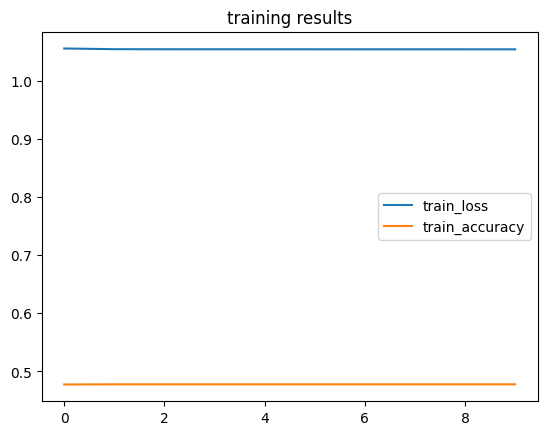

In [11]:

from models import recurrent_model


features = 64
model = recurrent_model()


epochs = 10
result = model.fit(full_dataset,epochs = epochs)

# Plotting code
plt.title("training results")
plt.plot(result.history['loss'], label='train_loss')
plt.plot(result.history['accuracy'], label='train_accuracy')
plt.legend()
plt.show()